In [19]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

In [20]:
#创建100个随机数
x_data = np.random.rand(100)
#创建噪音数据，形状和x_data一致
nosie = np.random.normal(0,0.01,x_data.shape)
y_data = x_data * 0.2 + 0.1 + nosie

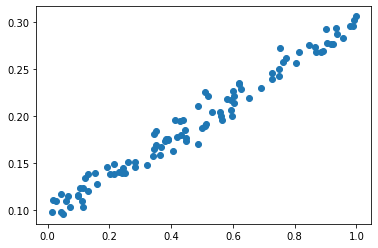

In [21]:
plt.scatter(x_data,y_data)
plt.show()

In [22]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [23]:
# 把numpy数据转换成 tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [46]:
# 构建神经网络模型

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.fc = nn.Linear(1,1)
    
    #定义网络计算
    def forward(self,x):
        out = self.fc(x)
        return out

In [47]:
# 定义模型
model = LinearRegression()
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(),lr=0.1)

In [48]:
for name,parameters in model.named_parameters():
    print("name:{},parm:{}".format(name,parameters))

name:fc.weight,parm:Parameter containing:
tensor([[0.1804]], requires_grad=True)
name:fc.bias,parm:Parameter containing:
tensor([0.5470], requires_grad=True)


In [49]:
for i in range(1001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out,target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200==0:
        print(i,loss.item())

0 0.19358409941196442
200 0.00010499142081243917
400 8.878227527020499e-05
600 8.870162855600938e-05
800 8.870122110238299e-05
1000 8.870121382642537e-05


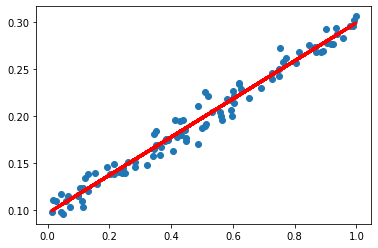

In [50]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()